# SIR modell készítése
#### Anita és Ádám közös munkája

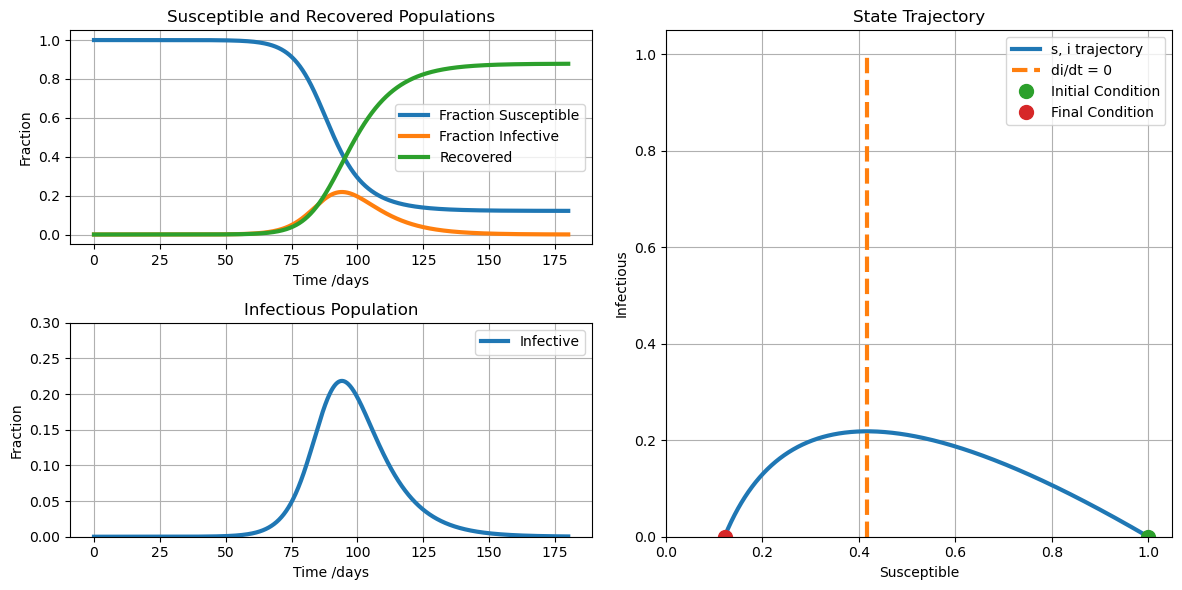

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 2.4
t_infective = 5.1 + 3.3 

# initial number of infected and recovered individuals
i_initial = 2/9800000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

In [11]:
import numpy as np
from scipy.integrate import odeint
import sympy as sym
import pandas as pd

In [8]:
t = sym.symbols('t')
S = sym.Function('S')(t)
I = sym.Function('I')(t)
R = sym.Function('R')(t)
beta = sym.symbols(u'β')
gamma = sym.symbols(u'γ')
dSdt=sym.Derivative(S,t)
dIdt=sym.Derivative(I,t)
dRdt=sym.Derivative(R,t)

In [10]:
eq1=sym.Equality(dSdt, -beta * S * I)
eq2=sym.Equality(dIdt, beta * S * I - gamma * I)
eq3=sym.Equality(dRdt,  gamma * I)

display(eq1,eq2,eq3)

Eq(Derivative(S(t), t), -β*I(t)*S(t))

Eq(Derivative(I(t), t), β*I(t)*S(t) - γ*I(t))

Eq(Derivative(R(t), t), γ*I(t))

In [69]:
sir_data=pd.read_csv("sir_data.csv")
sir_countries=["Austria","Finland","Germany","Hungary","Ireland","European Union"]
sir_data=sir_data[sir_data["Country"].isin(sir_countries)]
sir_indexes=[sir_data[sir_data['Country'] == country].index[-1] for country in sir_countries]
for index in sir_indexes:
    sir_data['R0'][index]=float(sir_data['R0'][index][0:(sir_data['R0'][index]).find('±')])
for index in sir_indexes:
    sir_data['Δt'][index]=float(sir_data['Δt'][index][0:(sir_data['Δt'][index]).find('±')])
sir_data

,Country,Population,R0,Rt,t*,T,Δt
0,Austria,8.840.521,4.38,0.45±0.01,13.37±0.68,6.49±0.47,8.33
8,Finland,5.515.525,1.62,0.92±0.01,25.05±0.51,1.20±0.68,24.25
10,Germany,82.905.782,6.33,0.58±0.01,17.06±1.39,12.41±0.71,3.25
12,Hungary,9.775.564,1.97,0.37±0.15,25.62±6.55,20.23±7.33,31.67
13,Ireland,4.867.309,1.94,0.57±0.03,30.78±0.53,5.94±1.28,30.0
27,European Union,446.786.293,4.22,0.67±0.18,18.61±6.43,10.82±4.65,17.24


In [73]:
for index in sir_indexes:
    print(sir_data["R0"][index]/sir_data["Δt"][index])

0.5258103241296519
0.06680412371134022
1.9476923076923076
0.06220397852857593
0.06466666666666666
0.24477958236658934


In [76]:
sir_data.insert(7, "Beta", [sir_data["R0"][index]/sir_data["Δt"][index] for index in sir_indexes], True)

In [77]:
sir_data

,Country,Population,R0,Rt,t*,T,Δt,Beta
0,Austria,8.840.521,4.38,0.45±0.01,13.37±0.68,6.49±0.47,8.33,0.525810
8,Finland,5.515.525,1.62,0.92±0.01,25.05±0.51,1.20±0.68,24.25,0.066804
10,Germany,82.905.782,6.33,0.58±0.01,17.06±1.39,12.41±0.71,3.25,1.947692
12,Hungary,9.775.564,1.97,0.37±0.15,25.62±6.55,20.23±7.33,31.67,0.062204
13,Ireland,4.867.309,1.94,0.57±0.03,30.78±0.53,5.94±1.28,30.0,0.064667
27,European Union,446.786.293,4.22,0.67±0.18,18.61±6.43,10.82±4.65,17.24,0.244780
